# What is data?

John Fox

Data is a record of the results of observations. Therefore, data describes the observation/s in numerical form. To perform statistic numerical representations of one's observations are necessary. Observations are represented by measurements and the frequency of the measurement (i.e. Frequency is a number that describes how many times you got the same measurement value.). The most fundamental statistics are the measurements and their respective frequencies. For example, a statistics teacher has 25 students. Each student tosses four coins and records the number of heads. The results are

\begin{equation*}
x = \begin{bmatrix}
2\;\; 2\;\; 0\;\; 1\;\; 1\;\; 1\;\; 2\;\; 3\;\; 1\;\; 2\;\; 2\;\; 3\;\; 3\;\; 4\;\; 1\;\; 3\;\; 2\;\; 3\;\; 3\;\; 1\;\; 2\;\; 2\;\; 1\;\; 2\;\; 2 
\end{bmatrix}
\end{equation*}

This data set can be better understood by sorting the values. For large datasets a programming language will be helpful. Here I will use Python.

In [1]:
# import necessary classes
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# make an array
x = np.array([2, 2, 0, 1, 1, 1, 2, 3, 1, 2, 2, 3, 3, 4,
              1, 3, 2, 3, 3, 1, 2, 2, 1, 2, 2])
# print the array as output
print 'x =', x
# print whitespace
print '\nsorted: \n'
# sort the array
x = np.sort(x, axis=None)
# print the sorted array
print 'x =', x

x = [2 2 0 1 1 1 2 3 1 2 2 3 3 4 1 3 2 3 3 1 2 2 1 2 2]

sorted: 

x = [0 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 4]


Examine the list of results, x. While unsorted, this list of values is difficult to understand. However, when the values are sorted it is clear that there are only 5 measures or values of concern. To be concise we can reduce this list down to the following:

\begin{equation*}
x = \begin{bmatrix} 
0\;\; 1\;\; 2\;\; 3\;\; 4
\end{bmatrix}
\end{equation*}

Clearly this reduced list is much easier to cognitvely digest. By itself it is incomplete. The list in its current state does not reveal how often each measure occurred. Hence we are missing information when looking at this reduced list. If we include the freqency of each value then we have all the information necessary to recreate the original list. A complete, reduced list looks like this:

\begin{equation*}
x = \begin{bmatrix} 
0\;\; 1\;\; 2\;\; 3\;\; 4 \\ 
1\;\; 7\;\; 10\;\; 6\;\; 1 
\end{bmatrix}
\end{equation*}

Now we all the information of the original list in reduced form. This reduced list shows the frequency distribution of values. 

Frequency Distribution of x = 
[[  0.   1.   2.   3.   4.]
 [  1.   7.  10.   6.   1.]]


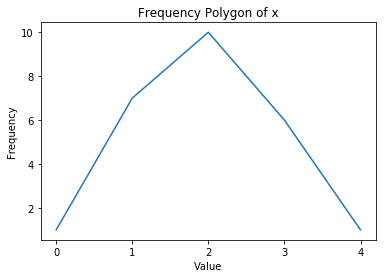

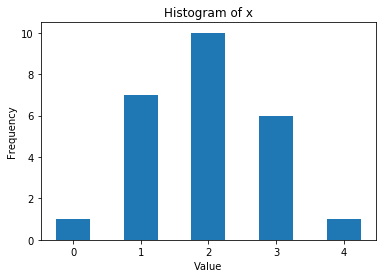

In [2]:
# lets reduce the list and detemine the frequency of each value
bins = 5                             # number of bins to sort data into
maxval = np.amax(x, axis=0)          # maximum value
minval = np.amin(x, axis=0);         # minimum value
l = len(x)                           # length of list, x
nx = x - np.matlib.repmat(minval,1,l)# subtract the minimum value
width = maxval - minval              # range of the data
binwidth = width/(bins-1)            # determine the width of the bins 

H = (2,5)
H = np.zeros(H)                      # allocate space for distribution

# for loop to bin the data
for i in range(len(x)):
    binval = int(x[i]/binwidth)      # compute the appropriate bin
    H[:,binval] = [x[i]+minval, H[1,binval] + 1] # does the binning

# print H as output
print 'Frequency Distribution of x = \n', H

# plot the freqency polygon of x
plt.figure('FreqPolygon')
locs, labels = plt.xticks()
plt.xticks(np.arange(minval,maxval+1,1))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Polygon of x')
plt.plot(H[0,:],H[1,:])
plt.show()

# plot the histogram; this is cool because numpy and matplotlib have some cool built-in capabilities
plt.figure('Histogram')
#locs, labels = plt.xticks()
#plt.xticks(np.arange(minval,maxval,1))
plt.hist(x,bins=np.arange(minval,maxval+2,1),rwidth=0.5,align='left')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of x')
plt.show()

Compare the two plots above. The first plot is called a frequency polygon. It is a line plot where each point represents the frequency of the corresponding value on the x-axis. The second plot is a histogram. The histogram is a bar chart where each bar represents a value or interval of values in the data set. The height of the bar represents the frequency of occurrence of its respective value or interval of values. The two plots above represent the same dataset. Notice in both that the most frequently occuring value is 2. In other words, as students flipped four coins and counted the number of heads, the event that 2 out of the four coins turned up heads occurred most often or 10 times. 

# Shapes of Distributions

Distributions have many shapes. Hence, there are many different distributions, and some are well understood. Let's look at some of the distributions that exhibit symmetry. The uniform distribution and the normal distribution are two symmetrical distributions, and the normal distribution is discussed most often. They are symmetrical because the right half of the curve mirrors the left half.   

Lets take a look at the uniform distribution followed by the normal distribution.

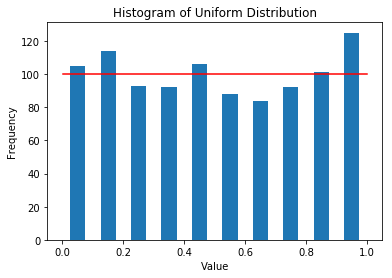

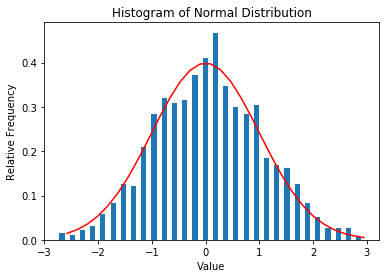

In [3]:
# python has useful tools for generating different distributions
# random uniform data
s = np.random.uniform(0,1,1000) # 1000 random points from uniform distribution
# plot the histogram; this is cool because numpy and matplotlib have some cool built-in capabilities
plt.figure('UHist')
count, bins, ignored = plt.hist(s,10,rwidth=0.5,align='mid') # plots histogram
plt.plot(bins,np.ones_like(bins)*100,'r') # plots probability mass function
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Uniform Distribution')
plt.show()

# normal distribution
mu, sigma = 0, 1 # mean and standard deviation of data
s = np.random.normal(mu,sigma,1000) # 1000 random points from normal distribution
plt.figure('NormHist')
count, bins, ignored = plt.hist(s,30,rwidth=0.5,align='mid',normed=True) # plots normed histogram
dbins = np.diff(bins) + bins[:-1:]
plt.plot(dbins,1/(sigma*np.sqrt(2*np.pi))*
                np.exp(-(dbins-mu)**2/(2*sigma**2)),'r') # plots probability mass function
plt.xlabel('Value')
plt.ylabel('Relative Frequency')
plt.title('Histogram of Normal Distribution')
plt.show()

Notice that the frequencies in the uniform distriubtion are similar. The red line plot represents are true uniform distriubtion in which the frequencies are the same for every value. 

Notice the shape of the normal distribution the frequencies are high in the middle and decrease as you look to the left and right. 

Asymmetrical distributions also exist. These distributions are referred to as skewed distributions. A skewed distribution may be positively or negatively skewed.

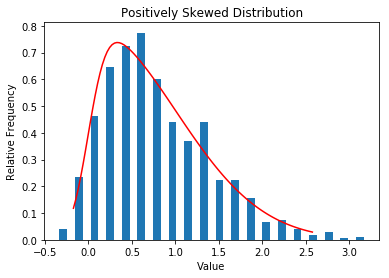

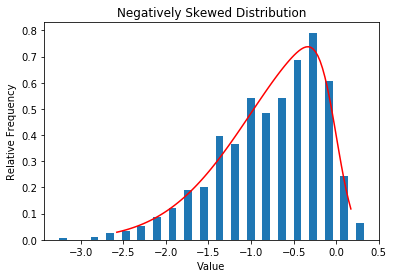

In [4]:
# postively skewed distribution
a = 6 # some number
mean, var, skew, kurt = stats.skewnorm.stats(a, moments='mvsk') # stats
x = np.linspace(stats.skewnorm.ppf(0.01, a),stats.skewnorm.ppf(0.99, a), 100) #values
rv = stats.skewnorm.rvs(a, size=1000) # get random numbers from skewed distribution
# create the plot
plt.figure('PosSkew')
plt.hist(rv,20,rwidth=0.5,align='mid',normed=True)
plt.plot(x, stats.skewnorm.pdf(x, a),'r')
plt.xlabel('Value')
plt.ylabel('Relative Frequency')
plt.title('Positively Skewed Distribution')
plt.show()

# negatively skewed distribution
a = -6 # some number
mean, var, skew, kurt = stats.skewnorm.stats(a, moments='mvsk') # stats
x = np.linspace(stats.skewnorm.ppf(0.01, a),stats.skewnorm.ppf(0.99, a), 100) #values
rv = stats.skewnorm.rvs(a, size=1000) # get random numbers from skewed distribution
# create the plot
plt.figure('NegSkew')
plt.hist(rv,20,rwidth=0.5,align='mid',normed=True)
plt.plot(x, stats.skewnorm.pdf(x, a),'r')
plt.xlabel('Value')
plt.ylabel('Relative Frequency')
plt.title('Negatively Skewed Distribution')
plt.show()



# Descriptive Statistics

Frequency distributions hold value because one can quickly see differences in sample scores. However, frequency distribtions can be complex. Practically speaking it is more efficient to reduce data down to a few single-valued statistics. Single-valued statistics provide a summary of the dataset; they capture the "big picture." By doing so single-valued statistics simplify the description of datasets. Characteristics of distributions that are useful to describe are location, dispersion, and covariance. 

Below several descriptive statistics pertaining to location, disperion, and covariance will be addressed. Before individual descriptives are defined a few rules should be presented.

Descriptive statistics should meet the requirements listed below:
    1. Descriptives should be single-valued.
    2. Descriptives should be accessible via arithmetic.
    3. Descriptives should account for all values in the distribution.
    4. Descriptives acccount for frequencies of all values in the distribution
    
## Measures of Central Tendency (Location)

### The Mode

The mode is the most frequently observed value in a dataset. When viewing the frequency distribtion the mode can be easily spotted by finding the peak. The corresponding value on the x-axis is the mode. For discrete data or categorical data the mode can be a valuable statistic (i.e. which diagnosis is seen most often). However, the mode is not always single-valued. Additionally when measuring continuous variables a mode may not exist (i.e. electromyographic signals). Additionally it should be noted that the mode does not take into account all values within the dataset; it is determined by inspection, not arithmetic. 

Look at the distribution below:

\begin{equation*}
x = \begin{bmatrix} 
0\;\; 1\;\; 2\;\; 3\;\; 4
\end{bmatrix} \\
f = \begin{bmatrix}
1\;\; 7\;\; 10\;\; 6\;\; 1 
\end{bmatrix}
\end{equation*}

x represents the values or scores, and f represents the corresponding frequency for each score in x. What is the mode? The largest value in f is 10. The corresponding value in x is 2. Hence, 2 is the mode. 

### The Median

The median is a value that divides the data into to equal halves. Given an odd number of scores, the median will be the middle number. In other words, the number of scores above the median will be equal to the number of scores below the median. Given an even number of scores the median is the midpoint between the two middle scores.

The median demonstrates its value in that it is always single valued and takes into account the frequency of all values. Median values are not influenced by extreme scores. Therefore for skewed distributions the median is a useful statistic. However, it does not take into account actual scores represented in the distrubution. The median requires a certain amount of inspection, not simply arithmetic.   

Look at the dataset below:

\begin{equation*}
x = \begin{bmatrix} 
0\;\; 1\;\; 1\;\; 1\;\; 1\;\; 1\;\; 1\;\; 1\;\; 2\;\; 2\;\; 2\;\; 2\;\; 2\;\; 2\;\; 2\;\; 2\;\; 2\;\; 2\;\; 3\;\; 3\;\; 3\;\; 3\;\; 3\;\; 3\;\; 4 
\end{bmatrix}
\end{equation*}

What is the median? There are 25 scores in total. This means that the middle score is the median. It is easy to see that the median is 2. 

### The Mean

The mean is statistic that is computed by summing all the scores and dividing the sum by the total number of scores. The mean is a statistic that takes into account every score; it is also algebraically tractable. However, the mean is influenced by extreme scores. 

The mean is computed as follows:

\begin{equation*}
\bar x = \frac{\sum_{i=1}^n x_i}{n}
\end{equation*}

A more computationally efficient method of computing the mean is below:

\begin{equation*}
\bar x = \frac{\sum_{i=1}^n x_i f_i}{n}
\end{equation*}

For example taking the following dataset

\begin{equation*}
x = \begin{bmatrix}
5\;\; 5\;\; 4\;\; 4\;\; 4\;\; 4\;\; 2\;\; 2\;\; 2
\end{bmatrix}
\end{equation*}

which can be reduced to

\begin{equation*}
x = \begin{bmatrix}
5\;\; 4\;\; 2
\end{bmatrix} \\
f = \begin{bmatrix}
2\;\; 4\;\; 3
\end{bmatrix}
\end{equation*}

where x is the set of scores and f is the frequency of each score in x. The mean can be calculated using the latter equation above.

\begin{equation*}
\bar x = \frac{5(2) + 4(4) + 2(3)}{9}
\end{equation*}

This shows that the mean is single-valued. It accounts for all scores and all frequencies. Additionally it is obtainable via arithmetic. Therefore, the mean is a measure of central tendency or location that meets the requirements of a good statistic. 

For more information see: [blue_text](Stats_Appendix_Mean)